# Parallel Scientific Computing II

## Solving Systems of Linear Equations

    
#### Anne Reinarz

# Overview

### Always thinking of
- large systems: $10^6 - 10^9$  unknowns
- sparse systems: typically only $O(N)$ non-zeros in the system matrix ($N$ unknowns)
- systems resulting from the discretization of PDEs


# PDE Operator $\leftrightarrow$ Linear System

### Many methods for discretising PDE operators exist:
- Finite Differences
- Finite Volume Methods
- Finite Element Methods
- Discontinuous Galerkin

### All transform a PDE into a linear system to be solved


# Iterative Solvers vs. Direct Solvers for sparse systems

## Direct Solvers
- Gaussian elimination $O(N^2)$,  $N$ degrees of freedom
- highly optimised sparse direct solvers can reach $O(N^{3/2})$
- without round-off errors, direct methods give an exact solution 

# Iterative Solvers vs. Direct Solvers for sparse systems

## Iterative Solvers
- consist only of matrix-vector products
- can easily achieve $O(N)$ for many problem types
- give an approximate solution 

# Iterative Solvers

- start with an initial guess for the solution, e.g. zero
- create a sequence approximate solutions, each improving on the previous one
- stop when the required tolerance has been reached


# Iterative Solvers

- We want to solve a linear system of equations
$$Ax = b~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$$ 
by finding a sequence of approximate solutions $x^{(k)}$ that converge to the true solution $x$

- The error is given by
$$e^{(k)} := x - x^{(k)}~~~~~~~~~~~~~~~~~~~~~~~~~~$$

# Iterative Solvers: Residuals

### Residual
$$r^{(k)} := b - Ax^{(x)}$$

- Relationship between residual and error
$$r^{(k)} := b - Ax^{(x)} = Ax - Ax^{(k)} = A(x-x^{(k)})= Ae^{(k)}$$

- Residual equation
$$r^{(k)} = Ae^{(k)}$$


# Iterative Solvers: Residuals

#### Note: 
- The residual is known (only uses known quantities
- The error is not known (we do not know the solution $x$)
- Residual can be used as an indicator for the size of the error

# Iterative Solvers: Residuals

- From now on we always work with the residual equation $r^{(k)}=Ae^{(k)}$ instead of $Ax^{(k)}=b$<br> We approximate the error $e^{(k)}$ in each step<br>This gives updates $x^{(k+1)} = x^{(k)} + \tilde e^{(k)}$
- where $\tilde e^{(k)}$ is an approximation of the error at this step

# Iterative Solvers: Residuals

- How to compute the approximations $\tilde e^{(k)}$ using the residual equation?

# Iterative Solvers: Residuals

#### Idea: Solve an easier equation instead

- Introduce a matrix $B$, such that 
    1. $B$ is easy to invert, e.g. a diagonal matrix
    2. $B$ is similar to $A$ in some sense $A\sim B$


# Iterative Solvers: Residuals

#### Idea: Solve an easier equation instead

- Then solve the residual equation for $B$
$$B\hat e^{(k)} = r^{(k)}$$
- Use $\hat e^{(k)}$ as an approximation to $e^{(k)}$
- Set $x^{(k+1)} = x^{(k)} + \hat e^{(k)}$

# Relaxation

### How should we choose B?
- $B$ should be “similar” to $A$, i.e. $B \sim A$
- more precisely $B^{-1} \approx A^{-1}$
    - or at least $B^{-1}y \approx A^{-1}y$ for most vectors $y$
- The residual equation $Be = r$ should be easy/fast to solve


# Relaxation

### Examples:
- $B = diag(A) = D_A$ (diagonal part of A)
     - Jacobi method (“Jacobi relaxation”)
- $B = L_A$ (lower triangular part of A)
     - Gauss-Seidel method (“Gauss-Seidel relaxation”)

# Jacobi Relaxation

#### For $k=1...$
- Solve $D_A \hat e^{(k)} = r^{(k)}$
- Update $x^{(k+1)} = x^{(k)} + \hat e^{(k)}$
- Update residual $r^{(k+1)} = b - Ax^{(k+1)}$



# Jacobi Relaxation

### or, more compactly:
- $x^{(k+1)} = x^{(k)} + D_A^{-1} r^{(k)} = x^{(k)} + D_A^{-1} (b − Ax^{(k)})$


# Jacobi Relaxation


### for analysis:
- $x^{(k+1)} = (I - D_A^{-1} A) x^{(k )} + D_A^{-1} b =: Mx^{(k )} + Nb$
- where $I$ is the identity matrix,
- $M= I - D_A^{-1} A$ and $N= D_A^{-1}$

In [1]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from scipy.sparse import diags
from ipywidgets import interact, FloatSlider, IntSlider

from IPython.display import display, clear_output

fig, ax = plt.subplots()
plt.close(fig)

def plotSol(Y):
    # use same y scale for all offsets
    X = np.linspace(0,1,Y.size)
    ax.clear();
    ax.set_xlim([0, 1])
    ax.plot(X, Y);
    display(fig)
    
def plotSol1(Y):
    # use same y scale for all offsets
    X = np.linspace(0,1,Y.size)
    ax.clear();
    ax.set_ylim([0, 1.1])
    ax.set_xlim([0,1])
    ax.plot(X, Y, marker='*');
    display(fig)
    
def plotSol2(Y, Y2):
    # use same y scale for all offsets
    Y.reshape(-1,1)
    Y2.reshape(-1,1)
    X = np.linspace(0,1,Y.size)
    #print("Y",Y)
    #print(Y2)
    ax.clear();
    ax.set_ylim([0, 1.1])
    ax.set_xlim([0,1])
    ax.plot(X, Y, marker='*');
    ax.plot(X, Y2, marker='*');
    display(fig)

N=100; h=1/N

# Jacobi Relaxation: Code Example

#### Let's start by defining a problem
- We want to solve $Ax=b$
#### 2 Examples:

In [3]:
diagonals1 = [-np.ones(N-1), 2*np.ones(N), -np.ones(N-1)]
A1 = diags(diagonals1, [-1, 0, 1]).toarray()/h/h
diagonals2 = [-np.ones(N-1), 2.1*np.ones(N), -np.ones(N-1)]
A2 = diags(diagonals2, [-1, 0, 1]).toarray()/h/h

#### Random Right-hand side

In [5]:
b = 20*np.matlib.rand(N,1)

# Jacobi Relaxation: Code Example

#### Next let's have a look at the solution (using a direct solver)

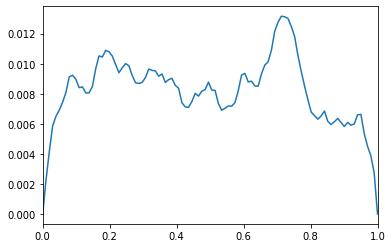

In [7]:
Y = np.linalg.solve(A2,b)                                # solve system for A1 or A2
Y = np.vstack((np.array([[0]]),Y,np.array([[0]])));      # add Dirichlet boundary
plotSol(Y)

In [8]:
#Acquire exact solutions
ex1 = np.linalg.solve(A1,b)                                # solve system
Y1 = np.vstack((np.array([[0]]),ex1,np.array([[0]])));      # add Dirichlet boundary
ex2 = np.linalg.solve(A2,b)                                # solve system
Y2 = np.vstack((np.array([[0]]),ex2,np.array([[0]])));      # add Dirichlet boundary

# Jacobi Relaxation: Code Example

#### Next we implement the Jacobi Smoother

In [11]:
def jacobiRelaxation(A, b, x0, maxIter):
    D = np.diag(np.diag(A))          # Define D_A
    D_inv = np.diag(1 / np.diag(D))  # precompute inverse
    x = x0
    for i in range(maxIter):
        x_new = np.dot(D_inv, b - np.dot(A-D, x)) # Jacobi Relaxation
        if(i == maxIter-1):
            print("Residual", np.linalg.norm(b - np.dot(A,x_new)))
        x = x_new
    return x

# Jacobi Relaxation: Code Example

In [13]:
def solveAndPlot(maxIter):
    x0 = np.zeros(N).reshape(-1,1)    # initial guess
    Y = jacobiRelaxation(A1,b,x0,maxIter);
    Y = np.vstack((np.array([[0]]),Y,np.array([[0]])))
    plotSol(abs(Y-Y1)) # Plot error
interactive_plot = interact(solveAndPlot, maxIter=IntSlider(min=1, max=300, step=10));

interactive(children=(IntSlider(value=1, description='maxIter', max=300, min=1, step=10), Output()), _dom_clas…

# Jacobi Relaxation

#### Implementation
- additional storage required (x_new)
- x, x_new can be computed in any order (and in parallel)

#### Properties
- matrix $A$ needs to be diagonally dominant

# Gauss-Seidel Relaxation

- Same general algorithm as Jacobi, but replace diagonal of A with lower triangular part of A
    - B = L_A (lower triangular part of A)
- Inverting B is expensive
- <em>but</em>: Computing y with $By = b$ is cheap
    - Use forward substitition to compute y
$$y_1 = \frac{b_1}{A_{11}},~ y_2 = \frac{b_2 - A_{21} x_1}{A_{22}},~  \dots , ~
  y_m = \frac{b_m - \sum_{i=1}^{m-1} A_{mi}x_i}{A_{mm}}.$$

# Gauss-Seidel Relaxation
#### Iteration formulas in matrix-vector notation:
- $ x^{(k+1)} = x^{(k)} + L_A^{-1} r^{(k)}
                   = x^{(k)} + L_A^{-1} \left( b - A x^{(k)} \right)$


# Gauss-Seidel Relaxation
#### Iteration formulas in matrix-vector notation:
- $ x^{(k+1)} = x^{(k)} + L_A^{-1} r^{(k)}
                   = x^{(k)} + L_A^{-1} \left( b - A x^{(k)} \right)$

#### for implementation:
- After inserting substition rule: 
$x^{(k+1)}_m = A_{mm}^{-1}\left(b_m - \sum_{i=1}^{N}A_{mi}x^{(k)}_i + A_{mm}x^{(k)}_m \right)$



# Gauss-Seidel Relaxation

#### for analysis:
- $x^{(k+1)} = \left( I - L_A^{-1}A \right) x^{(k)}  + L_A^{-1} b
                   =: M x^{(k)} + N b$


# Gauss-Seidel Relaxation: Code Example

In [14]:
def gaussSeidelRelaxation(A, b, x0, maxIter):
    x = x0  # initial guess
    res = b - np.dot(A,x)                        # initial residual
    for i in range(maxIter):
        for j in range(0,N):
            x[j] = (1/A[j,j]) * (b[j] - np.dot(A[j,:],x) + A[j,j]*x[j]); # forward substitution and update
        res = b - np.dot(A,x)  
        if(i == maxIter-1):
            print("Residual", np.linalg.norm(res)) 
    return x

# Gauss-Seidel Relaxation: Code Example

In [15]:
def solveAndPlot(maxIter):
    x0 = np.zeros(N).reshape(-1,1)    # initial guess
    Y = gaussSeidelRelaxation(A2,b,x0,maxIter);
    Y = np.vstack((np.array([[0]]),Y,np.array([[0]])))
    plotSol(abs(Y-Y2)) # Plot error
interactive_plot = interact(solveAndPlot, maxIter=IntSlider(min=1, max=300, step=10));

interactive(children=(IntSlider(value=1, description='maxIter', max=300, min=1, step=10), Output()), _dom_clas…

# Gauss-Seidel Relaxation

#### Implementation
- x_new not needed
- x can be computed in place

#### Properties
- matrix $A$ needs to be symmetric positive definite (or strictly diagonally dominant)
- usually faster convergence than Jacobi

# Successive-Over-Relaxation (SOR)

- observation: Gauss-Seidel and Jacobi corrections are “too small”
- add an over-relaxation-factor $\alpha$:
#### For Jacobi Method
- $x_i^{new} = x_i + \alpha \cdot A_{ii}^{-1}( b_i - \sum_{j=1}^N  A_{ij} x_j)$
- for 2D Poisson model problem (e.g. matrix A1):
    - optimal $\alpha \approx 1.7$ improves convergence: $O(n^2) \to O(n^{3/2})$

# SOR: Code Example

#### Only need to modify the Jacobi example slightly

In [17]:
def SOR(A, b, alpha, x0, maxIter):
    x = x0  # initial guess
    xnew = np.zeros(N).reshape(-1,1)
    for i in range(maxIter):
        for j in range(0,N):
            xnew[j] =  x[j] + (alpha/A[j,j]) * (b[j] - np.dot(A[j,:],x));
        if(i == maxIter-1):
            print("Residual", np.linalg.norm( b - np.dot(A,x))) 
        x = xnew
    return x

# SOR: Code Example

#### Only need to modify the Jacobi example slightly

In [19]:
def solveAndPlot(maxIter):
    Y = SOR(A2,b,1.7,np.zeros(N).reshape(-1,1),maxIter);
    Y = np.vstack((np.array([[0]]),Y,np.array([[0]])))
    plotSol(abs(Y-Y2)) # Plot error
interactive_plot = interact(solveAndPlot, maxIter=IntSlider(min=1, max=300, step=10));

interactive(children=(IntSlider(value=1, description='maxIter', max=300, min=1, step=10), Output()), _dom_clas…

# Relaxation Methods: Summary

#### How about performance? usually quite slow
- Code Example ($N=100$): 
    1. Jacobi:needed 140 of iterations to reach tol=$1e-4$
    2. Gauss-Seidel: needed $70$ iterations tol=$1e-4$
    3. SOR: needed $36$ iterations tol=$1e-4$


# Relaxation Methods: Summary


#### Our next topics:
1. How slow are the methods exactly?
2. What is the underlying reason?
3. Is there a fix?

# Smoothing Property of Relaxation Methods

### Observation
- slow convergence
- smooth error components are reduced very slowly
- high frequency error components are damped more efficiently 
    - especially for Gauss-Seidel relaxation(SOR)

## Smoothing Properties: Model Problem (1D Poisson)

\begin{align}
- \partial_x^2 u (x) = 0\text{ on }\Omega = (0, 1),\\
u(0) = u(1) = 0
\end{align}

- Note: Solution will be zero, but useful for seeing why Jacobi reduces high-frequency components

## Smoothing Properties: Model Problem (1D Poisson)

- discretised on a uniform grid of mesh size h = 1/(N+1)
- grid points are $x_j := jh$, with $j = 1, . . . , N$
- compute values at grid points $u_j  = u(x_j)$
- system matrix A computed using 
    - $\partial_x u(x) \approx \frac{u(x+h)-u(x)}{h}$ $\to$ $\partial_x^2 u(x) \approx \frac{u(x+h)-2u(x)+u(x-h)}{h^2}$
    

## Smoothing Properties: Model Problem (1D Poisson)

#### Tridiagonal matrix:

In [20]:
N=4; h = 1/5;
diagonals1 = [-np.ones(N-1), 2*np.ones(N), -np.ones(N-1)]
A = diags(diagonals1, [-1, 0, 1]).toarray()/h/h
A

array([[ 50., -25.,   0.,   0.],
       [-25.,  50., -25.,   0.],
       [  0., -25.,  50., -25.],
       [  0.,   0., -25.,  50.]])

## Model Problem: Jacobi Relaxation

- Scheme for$j$-th vector entry: $u_j^{(k +1)} = \frac{1}{2}(u_{j+1}^{(k)} + u_{j−1}^{(k)})$
- in this case, error: $e_j(k) = 0 - u_j^{(k)}$

In [21]:
maxIter = 2
def iterateAndPlot(k):
    Y = np.ones(N); #Initial guess: one
    if(maxIter>1): Y = jacobiRelaxation(A,np.zeros(N).reshape(-1,1),Y.reshape(-1,1), maxIter-1)
    Ynew = np.copy(Y)
    for i in range(k): # perform Jacobi step for index 1...k
            if(i==0):
                Ynew[i] = 0.5*Y[i+1]
            if(i>0 and i < N-1):
                Ynew[i] = 0.5*(Y[i+1]+Y[i-1])
            elif(i==N-1):
                Ynew[i]= 0.5*Y[i-1]
    plotSol2(abs(Ynew),abs(Y)) # Plot error
interactive_plot = interact(iterateAndPlot, k=IntSlider(min=0, max=N, step=1));

interactive(children=(IntSlider(value=0, description='k', max=4), Output()), _dom_classes=('widget-interact',)…

## Model Problem: Gauss-Seidel Relaxation

- Scheme for$j$-th vector entry: $u_j^{(k +1)} = \frac{1}{2}(u_{j+1}^{(k)} + u_{j−1}^{(k+1)})$
- in this case, error: $e_j(k) = 0 - u_j^{(k)}$

In [22]:
def iterateAndPlot(k):
    maxIter = 1
    Y = np.ones(N); #Initial guess: one
    if(maxIter>1): Y = gaussSeidelRelaxation(A,np.zeros(N).reshape(-1,1),Y.reshape(-1,1), maxIter-1)
    for i in range(k): # perform Jacobi step for index 1...k
            if(i==0):
                Y[i] = 0.5*Y[i+1]
            if(i>0 and i < N-1):
                Y[i] = 0.5*(Y[i+1]-Y[i-1])
            elif(i==N-1):
                Y[i]= 0.5*Y[i-1]
    plotSol1(abs(Y)) # Plot error
interactive_plot = interact(iterateAndPlot, k=IntSlider(min=0, max=N, step=1));

interactive(children=(IntSlider(value=0, description='k', max=4), Output()), _dom_classes=('widget-interact',)…

# Convergence Analysis

- remember iteration scheme: $x^{(i+1)} = M x^{(i)} + N b$
- derive iterative scheme for the error $e^{(i)} := x - x^{(i)}$:
    - $e^{(i+1)} = x - x^{(i+1)} =  x - M x^{(i)} - N b$

- hence: \begin{align} e^{(i+1)} &= M x + N b - M x^{(i)} - N b  \\ &= M x - M x^{(i)} = M e^{(i)} \\ \Rightarrow  e^{(i)} &= M^i e^{(0)}. \end{align}


# Convergence Analysis

- iteration equation for error: $e^{(i)} = M^i e^{(0)}$
- consider eigenvalues $\mu_k$ and eigenvectors $v_k$ of iteration matrix $M$: 
$$M v_k = \mu_k v_k  \quad\Rightarrow \quad M \bigl( \sum_k \alpha_k v_k \bigr) = \sum_k \alpha_k M v_k  = \sum_k \mu_k \alpha_k v_k $$
           

# Convergence Analysis

           
- write error as combination of eigenvectors: 
    - $e^{(0)} = \sum_{k} \alpha_k v_k$, 
    - then: $$M^i e^{(0)} = M^i \bigl( \sum_k \alpha_k v_k \bigr) =\sum_k (\mu_k)^i \alpha_k v_k $$
                        
- convergence, if all $\left| \mu_k \right| < 1$
- speed of convergence dominated by largest eigenvalue $\mu_k$

# The Smoothing Property

### Fourier mode analysis

- decompose the error $e^{(i)}$ into eigenvectors $\to$ for 1D Poisson: $\sin(k \pi x_j)$
- determine convergence factors for eigenvectors

### Observation
- The <b>high</b> frequency part (with respect to the underlying grid) is reduced quite quickly.

- The <b>low</b> frequency part (w.r.t. the grid) decreases only very slowly; actually the slower, the finer the grid is.

# The Smoothing Property

### Important Note on Residuals
- the smoothest (slowest converging) component corresponds to the smallest eigenvalue of $A$
- remember residual equation: $Ae = r$:
    - if $e = v^{(1)}$, then $r = \lambda_1 v^{(1)}$


####  $\Rightarrow$ <em>small residual, but large error</em>
####  $\Rightarrow$ in such a situation, any residual-based correction will normally fail

# Summary

- Smoothers good for reducing high-frequency errors
- Otherwise very slow convergence
- Gauss-Seidel and SOR, usually slightly faster than Jacobi
- Useful in conjunction with other methods (Multigrid/CG)

# Questions

- The webpage contains an exercise on the eigenvalues of the Laplace equation. Working through those, can help understand the behaviour we have seen here.
- The solution is in smoothers-II.ipynb